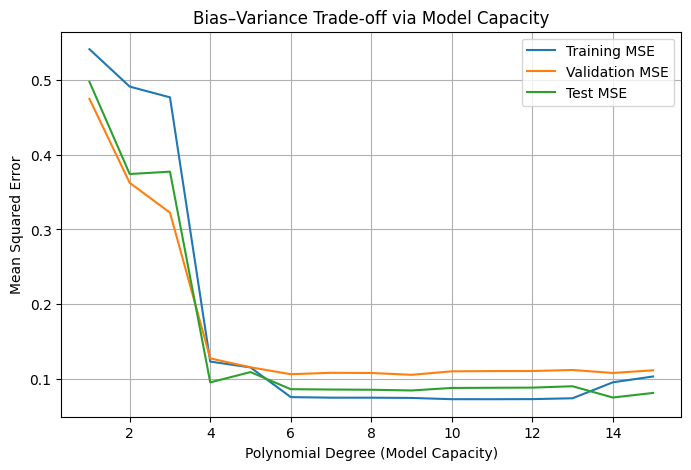

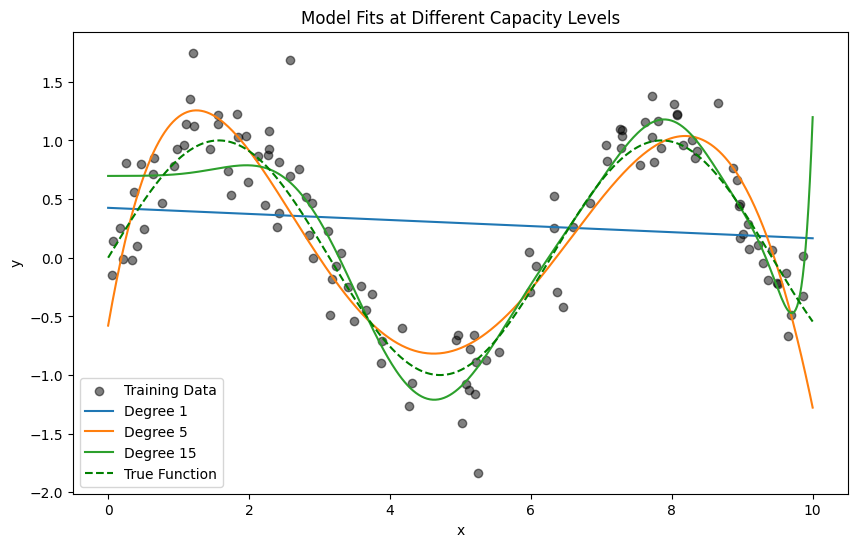


=== Bias–Variance Performance Summary ===

Degree | Train MSE | Val MSE | Test MSE
---------------------------------------
  1    |   0.5417 |  0.4751 |   0.4980
  2    |   0.4916 |  0.3625 |   0.3743
  3    |   0.4772 |  0.3226 |   0.3775
  4    |   0.1228 |  0.1271 |   0.0949
  5    |   0.1149 |  0.1152 |   0.1087
  6    |   0.0751 |  0.1059 |   0.0858
  7    |   0.0744 |  0.1077 |   0.0853
  8    |   0.0744 |  0.1075 |   0.0850
  9    |   0.0740 |  0.1051 |   0.0840
  10   |   0.0724 |  0.1097 |   0.0874
  11   |   0.0723 |  0.1100 |   0.0877
  12   |   0.0725 |  0.1102 |   0.0879
  13   |   0.0736 |  0.1115 |   0.0897
  14   |   0.0950 |  0.1075 |   0.0746
  15   |   0.1028 |  0.1111 |   0.0807


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Reproducibility
np.random.seed(42)

# -------------------------------
# 1. Generate synthetic dataset
# -------------------------------
n_samples = 200
X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
y_true = np.sin(X).ravel()
noise = np.random.normal(0, 0.3, size=n_samples)
y = y_true + noise

# Train / Validation / Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# -------------------------------
# 2. Model capacity settings
# -------------------------------
degrees = range(1, 16)

train_errors = []
val_errors = []
test_errors = []

models = {}

# -------------------------------
# 3. Train models of increasing capacity
# -------------------------------
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    models[degree] = (model, poly)

# -------------------------------
# 4. Plot bias–variance curves
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label="Training MSE")
plt.plot(degrees, val_errors, label="Validation MSE")
plt.plot(degrees, test_errors, label="Test MSE")
plt.xlabel("Polynomial Degree (Model Capacity)")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Trade-off via Model Capacity")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5. Visualise model fits
# -------------------------------
x_plot = np.linspace(0, 10, 500).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="black", alpha=0.5, label="Training Data")

for degree in [1, 5, 15]:
    model, poly = models[degree]
    y_plot = model.predict(poly.transform(x_plot))
    plt.plot(x_plot, y_plot, label=f"Degree {degree}")

plt.plot(x_plot, np.sin(x_plot), color="green", linestyle="--", label="True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Fits at Different Capacity Levels")
plt.legend()
plt.show()

# -------------------------------
# 6. Print performance table
# -------------------------------
print("\n=== Bias–Variance Performance Summary ===\n")
print("Degree | Train MSE | Val MSE | Test MSE")
print("---------------------------------------")
for d, tr, v, te in zip(degrees, train_errors, val_errors, test_errors):
    print(f"{d:^6} | {tr:8.4f} | {v:7.4f} | {te:8.4f}")
